In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder as le, MinMaxScaler as mm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, roc_auc_score, recall_score, roc_curve
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,class,Id
0,x,x,x,x,o,o,x,o,o,0,0
1,x,x,x,x,o,o,o,x,o,0,1
2,x,x,x,x,o,o,o,b,b,0,3
3,x,x,x,x,o,b,o,b,o,0,7
4,x,x,x,x,o,b,b,o,o,0,8


In [5]:
df.columns

Index(['top_left_square', 'top_middle_square', 'top_right_square',
       'middle_left_square', 'middle_middle_square', 'middle_right_square',
       'bottom_left_square', 'bottom_middle_square', 'bottom_right_square',
       'class', 'Id'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder as le
le= le()
for i in ['top_left_square', 'top_middle_square', 'top_right_square','middle_left_square', 'middle_middle_square', 'middle_right_square','bottom_left_square', 'bottom_middle_square', 'bottom_right_square','class', 'Id']:
        df[i] = le.fit_transform(df[i])

In [7]:
y=df[['class']]
x=df.iloc[:, 0:9]
from sklearn.tree import DecisionTreeClassifier as dt
dt = dt()
dt.fit(x,y)

DecisionTreeClassifier()

In [8]:
df1 = pd.read_csv('tic_tac_toe_dataset.csv')
from sklearn.preprocessing import LabelEncoder as le
le= le()
for i in df1.columns:
    df1[i] = le.fit_transform(df1[i])

In [9]:
df1


,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,class
0,2,2,2,2,1,1,2,1,1,0
1,2,2,2,2,1,1,1,2,1,0
2,2,2,2,2,1,1,1,1,2,0
3,2,2,2,2,1,1,1,0,0,0
4,2,2,2,2,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,1
954,1,2,1,2,2,1,2,1,2,1
955,1,2,1,2,1,2,2,1,2,1
956,1,2,1,1,2,2,2,1,2,1


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,shuffle=True,random_state=1,train_size=0.8)

In [33]:
ypred=dt.predict(x)
print("Training accuracy is ",dt.score(x,y))
print("Test Accuracy =",dt.score(xtest,ytest))

Training accuracy is  1.0
Test Accuracy = 1.0


[Text(0.4252277327935223, 0.9615384615384616, 'x[4] <= 1.5\ngini = 0.458\nsamples = 662\nvalue = [427, 235]'),
 Text(0.19078947368421054, 0.8846153846153846, 'x[4] <= 0.5\ngini = 0.5\nsamples = 350\nvalue = [179, 171]'),
 Text(0.07894736842105263, 0.8076923076923077, 'x[8] <= 1.5\ngini = 0.421\nsamples = 116\nvalue = [81, 35]'),
 Text(0.024291497975708502, 0.7307692307692307, 'x[0] <= 1.5\ngini = 0.496\nsamples = 55\nvalue = [30, 25]'),
 Text(0.016194331983805668, 0.6538461538461539, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.032388663967611336, 0.6538461538461539, 'x[8] <= 0.5\ngini = 0.408\nsamples = 42\nvalue = [30, 12]'),
 Text(0.024291497975708502, 0.5769230769230769, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.04048582995951417, 0.5769230769230769, 'x[2] <= 1.5\ngini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(0.016194331983805668, 0.5, 'x[6] <= 1.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.008097165991902834, 0.4230769230769231, 'gini = 0.0

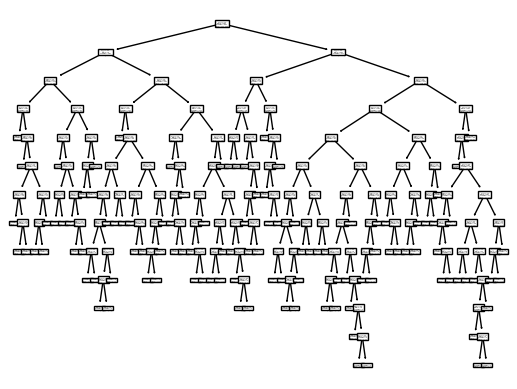

In [12]:
from sklearn.tree import plot_tree as pt
y
pt(dt)

In [13]:
from sklearn.tree import DecisionTreeClassifier
gv = {'criterion':['gini','entrophy'],'max_depth':[2,3,4,5,6],'max_features':[1,2,3]}
model = GridSearchCV(DecisionTreeClassifier(),param_grid=gv,scoring='accuracy',cv=5)
model.fit(x,y)

/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/rahul/anaconda3/lib/python3.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3]},
             scoring='accuracy')

In [14]:
model.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=3)

[Text(0.54453125, 0.9285714285714286, 'x[4] <= 1.5\ngini = 0.458\nsamples = 662\nvalue = [427, 235]'),
 Text(0.309375, 0.7857142857142857, 'x[6] <= 1.5\ngini = 0.5\nsamples = 350\nvalue = [179, 171]'),
 Text(0.16875, 0.6428571428571429, 'x[7] <= 1.5\ngini = 0.482\nsamples = 180\nvalue = [73, 107]'),
 Text(0.1, 0.5, 'x[8] <= 1.5\ngini = 0.497\nsamples = 112\nvalue = [60, 52]'),
 Text(0.05, 0.35714285714285715, 'x[3] <= 1.5\ngini = 0.494\nsamples = 45\nvalue = [20, 25]'),
 Text(0.025, 0.21428571428571427, 'x[0] <= 1.5\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.0125, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0375, 0.07142857142857142, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.075, 0.21428571428571427, 'x[0] <= 1.5\ngini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(0.0625, 0.07142857142857142, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.0875, 0.07142857142857142, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.15,

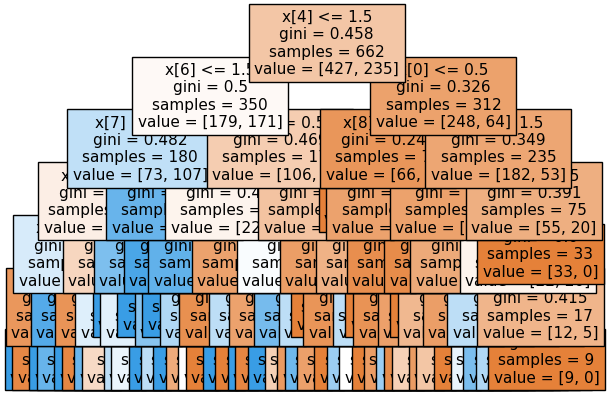

In [16]:
pt(model.best_estimator_,fontsize=11,filled=True)

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=3,p=1)
knn.fit(x,y)

/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3, p=1)

In [25]:
import numpy as np
n = int(np.sqrt(len(x)))
ll = []
ll_error = []
for i in range(1,n):
    knn=KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(x,y)
    ypred = knn.predict(xtest)
    ll.append(accuracy_score(ytest,ypred))
    ll_error.append(accuracy_score(ytest,ypred))
print("accuacy ",max(ll))

accuacy  1.0


/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [23]:
from sklearn.naive_bayes import GaussianNB as gn
nb =gn()
nb.fit(x, y)
ypred = nb.predict(xtest)
nb.score(xtest,ytest)

/home/rahul/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.706766917293233

In [28]:
rf = RandomForestClassifier(n_estimators=100)

In [29]:
rf.fit(x,y)

/tmp/ipykernel_7813/2439990766.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestClassifier()

In [30]:
rf.score(xtest,ytest)

1.0

In [32]:
rf.score(xtrain,ytrain)

1.0

In [36]:
accuracy_score(ypred, y)

1.0